# **FRAUD DETECTION MODEL BUILDING**

In [ ]:
import json
data = []
with open('/content/drive/MyDrive/Fraud Detection/transactions.txt', 'r') as file:
    for line in file:
        line.strip()
        if line:
            data.append(json.loads(line))

In [ ]:
variables = []
for key in data[0]:
    variables.append(key)

In [ ]:
import pandas as pd
df = pd.DataFrame(data)

In [ ]:
pd.set_option('display.max_columns', None)
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1283.28,,,,False,,,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [ ]:
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [ ]:
missing_value = round(100 * df.applymap(lambda x: x == "").sum()/df.shape[0], 2)
features_todrop = []
for indx, perc in missing_value.items():
  if perc > 50.00:
    features_todrop.append(indx)

In [ ]:
missing_value

accountNumber                 0.00
customerId                    0.00
creditLimit                   0.00
availableMoney                0.00
transactionDateTime           0.00
transactionAmount             0.00
merchantName                  0.00
acqCountry                    0.58
merchantCountryCode           0.09
posEntryMode                  0.52
posConditionCode              0.05
merchantCategoryCode          0.00
currentExpDate                0.00
accountOpenDate               0.00
dateOfLastAddressChange       0.00
cardCVV                       0.00
enteredCVV                    0.00
cardLast4Digits               0.00
transactionType               0.09
echoBuffer                  100.00
currentBalance                0.00
merchantCity                100.00
merchantState               100.00
merchantZip                 100.00
cardPresent                   0.00
posOnPremises               100.00
recurringAuthInd            100.00
expirationDateKeyInMatch      0.00
isFraud             

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776668 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   accountNumber            776668 non-null  int64         
 1   creditLimit              776668 non-null  float64       
 2   availableMoney           776668 non-null  float64       
 3   transactionDateTime      776668 non-null  datetime64[ns]
 4   transactionAmount        776668 non-null  float64       
 5   merchantName             776668 non-null  object        
 6   acqCountry               776668 non-null  object        
 7   merchantCountryCode      776668 non-null  object        
 8   posEntryMode             776668 non-null  object        
 9   posConditionCode         776668 non-null  object        
 10  merchantCategoryCode     776668 non-null  object        
 11  currentExpDate           776668 non-null  datetime64[ns]
 12  accountOpenDate      

In [ ]:
features_todrop

['echoBuffer',
 'merchantCity',
 'merchantState',
 'merchantZip',
 'posOnPremises',
 'recurringAuthInd']

In [ ]:
df.drop(features_todrop, axis=1, inplace=True)

In [ ]:
import numpy as np
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True, axis=0)

In [ ]:
round(100 * df.applymap(lambda x: x == "").sum()/df.shape[0], 2)

accountNumber               0.0
customerId                  0.0
creditLimit                 0.0
availableMoney              0.0
transactionDateTime         0.0
transactionAmount           0.0
merchantName                0.0
acqCountry                  0.0
merchantCountryCode         0.0
posEntryMode                0.0
posConditionCode            0.0
merchantCategoryCode        0.0
currentExpDate              0.0
accountOpenDate             0.0
dateOfLastAddressChange     0.0
cardCVV                     0.0
enteredCVV                  0.0
cardLast4Digits             0.0
transactionType             0.0
currentBalance              0.0
cardPresent                 0.0
expirationDateKeyInMatch    0.0
isFraud                     0.0
dtype: float64

In [ ]:
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [ ]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [ ]:
df.drop('customerId', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776668 entries, 0 to 786362
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             776668 non-null  object 
 1   creditLimit               776668 non-null  float64
 2   availableMoney            776668 non-null  float64
 3   transactionDateTime       776668 non-null  object 
 4   transactionAmount         776668 non-null  float64
 5   merchantName              776668 non-null  object 
 6   acqCountry                776668 non-null  object 
 7   merchantCountryCode       776668 non-null  object 
 8   posEntryMode              776668 non-null  object 
 9   posConditionCode          776668 non-null  object 
 10  merchantCategoryCode      776668 non-null  object 
 11  currentExpDate            776668 non-null  object 
 12  accountOpenDate           776668 non-null  object 
 13  dateOfLastAddressChange   776668 non-null  object

In [ ]:
features_notobject = ["accountNumber", "cardCVV", "enteredCVV", "cardLast4Digits"]
for column in features_notobject:
  df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
features_date = ['transactionDateTime', 'currentExpDate', 'accountOpenDate',
                 'dateOfLastAddressChange', 'expirationDateKeyInMatch']
for column in features_date:
  df[column] = pd.to_datetime(df[column], errors='coerce')

<ipython-input-10-4a2a19b375e0>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776668 entries, 0 to 786362
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             776668 non-null  int64         
 1   creditLimit               776668 non-null  float64       
 2   availableMoney            776668 non-null  float64       
 3   transactionDateTime       776668 non-null  datetime64[ns]
 4   transactionAmount         776668 non-null  float64       
 5   merchantName              776668 non-null  object        
 6   acqCountry                776668 non-null  object        
 7   merchantCountryCode       776668 non-null  object        
 8   posEntryMode              776668 non-null  object        
 9   posConditionCode          776668 non-null  object        
 10  merchantCategoryCode      776668 non-null  object        
 11  currentExpDate            776668 non-null  datetime64[ns]
 12  account

In [ ]:
df.drop('expirationDateKeyInMatch', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776668 entries, 0 to 786362
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   accountNumber            776668 non-null  int64         
 1   creditLimit              776668 non-null  float64       
 2   availableMoney           776668 non-null  float64       
 3   transactionDateTime      776668 non-null  datetime64[ns]
 4   transactionAmount        776668 non-null  float64       
 5   merchantName             776668 non-null  object        
 6   acqCountry               776668 non-null  object        
 7   merchantCountryCode      776668 non-null  object        
 8   posEntryMode             776668 non-null  object        
 9   posConditionCode         776668 non-null  object        
 10  merchantCategoryCode     776668 non-null  object        
 11  currentExpDate           776668 non-null  datetime64[ns]
 12  accountOpenDate      

## **EDA**

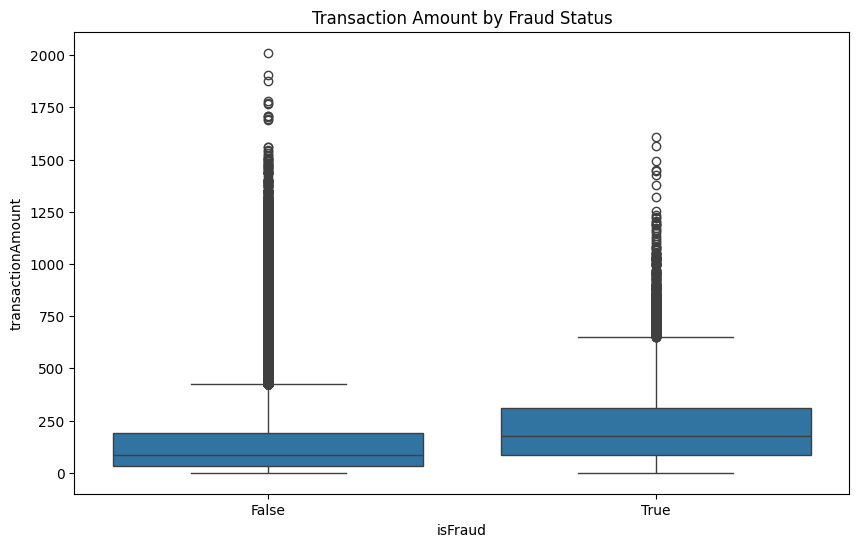

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='transactionAmount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.show()

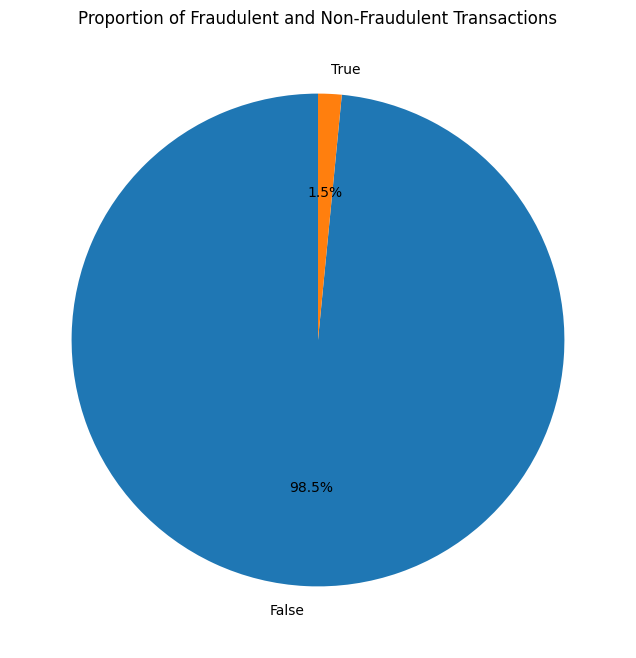

In [ ]:
fraud_count = df['isFraud'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fraud_count, labels=fraud_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Fraudulent and Non-Fraudulent Transactions')
plt.show()

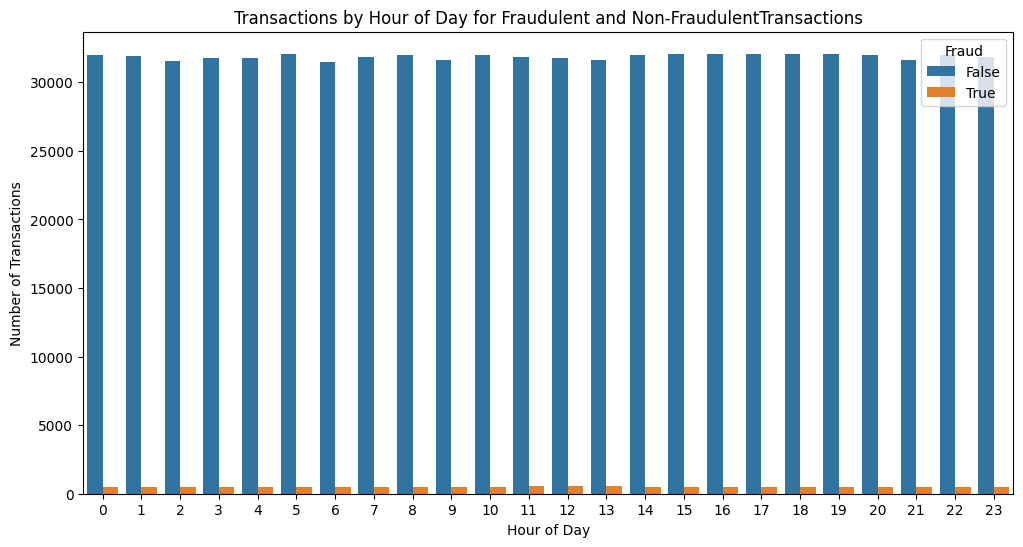

In [ ]:
df['hour'] = df['transactionDateTime'].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(x='hour', hue='isFraud', data=df)
plt.title('Transactions by Hour of Day for Fraudulent and Non-Fraudulent\
Transactions')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Fraud')
plt.show()

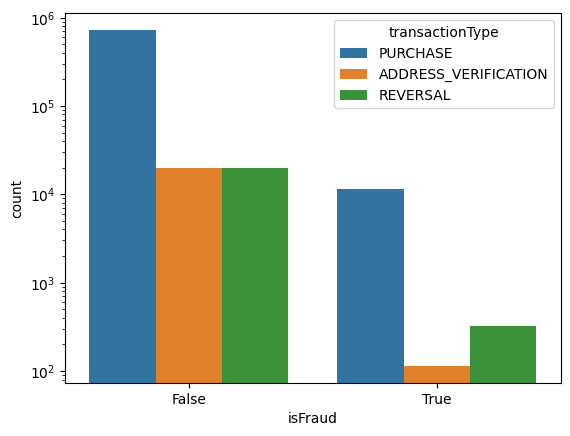

In [ ]:
sns.countplot(x="isFraud", data=df, hue="transactionType")
plt.yscale('log')
plt.show()

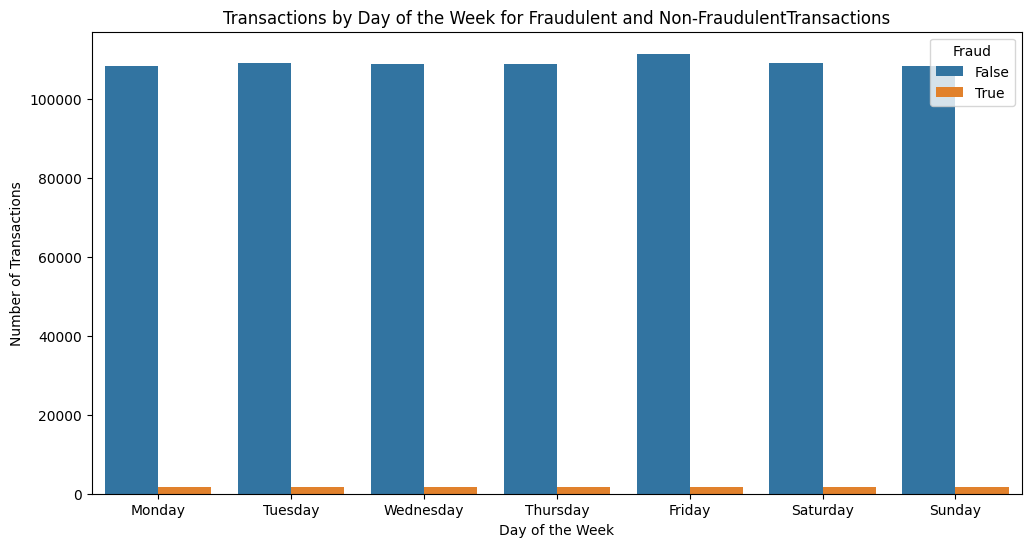

In [ ]:
df['day_of_week'] = df['transactionDateTime'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='isFraud', data=df, order=['Monday',
            'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transactions by Day of the Week for Fraudulent and Non-Fraudulent\
Transactions')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.legend(title='Fraud')
plt.show()


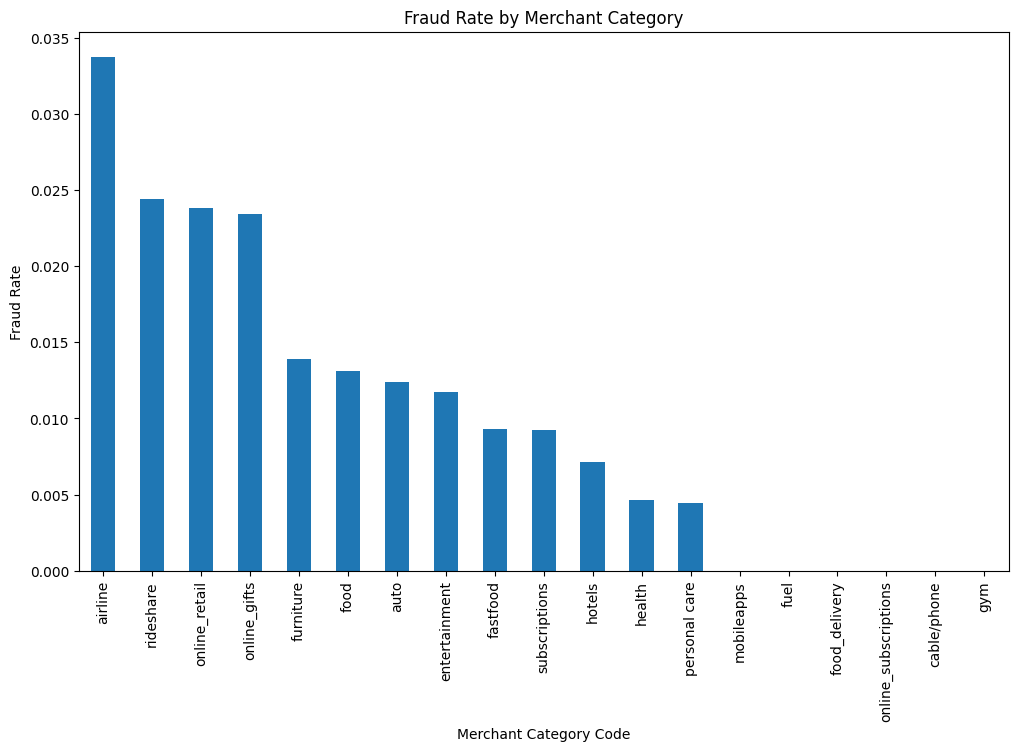

In [ ]:
merchant_fraud_rate = df.groupby('merchantCategoryCode')['isFraud'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
merchant_fraud_rate.plot(kind='bar')
plt.title('Fraud Rate by Merchant Category')
plt.ylabel('Fraud Rate')
plt.xlabel('Merchant Category Code')
plt.show()

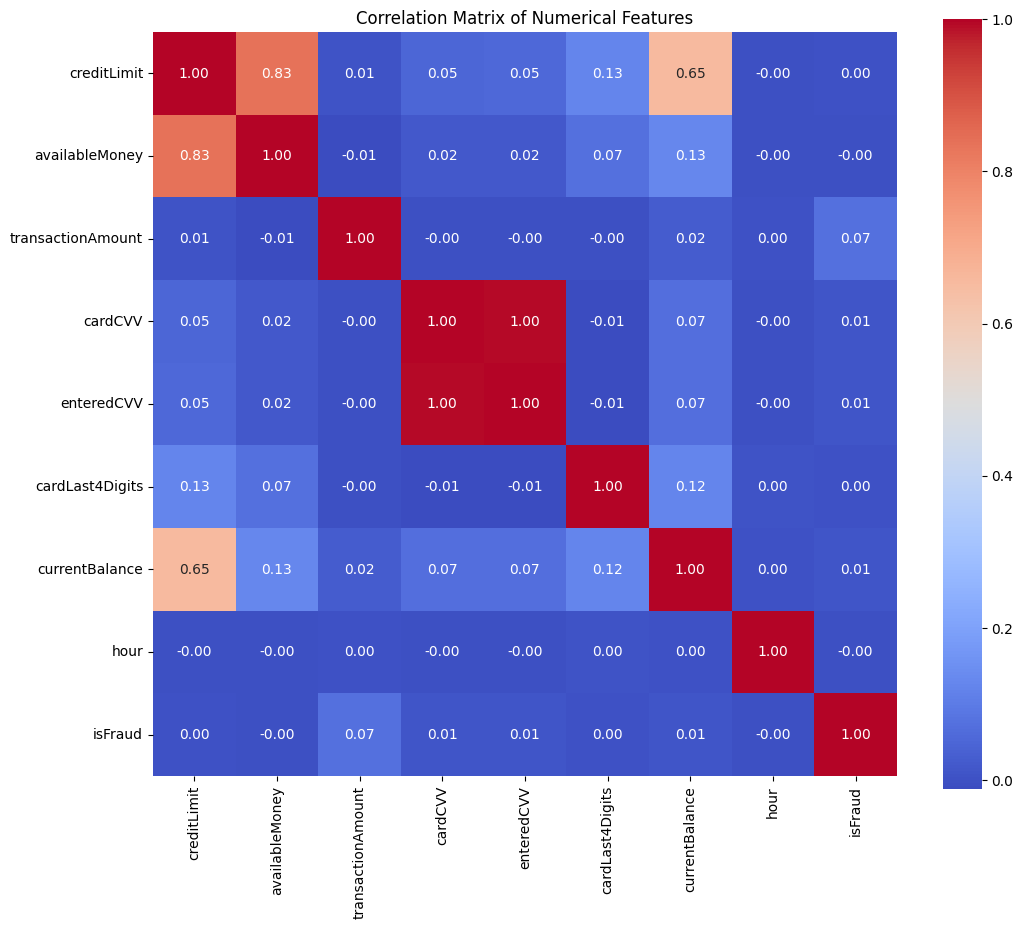

In [ ]:
columns_corr = ["creditLimit","availableMoney","transactionAmount","cardCVV",
                "enteredCVV", "cardLast4Digits", "currentBalance", "hour",
                "isFraud"]
corr = df[columns_corr].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')

plt.show()

# **Model Building**

**## Feature Selection**

In [ ]:
df.columns

Index(['accountNumber', 'creditLimit', 'availableMoney', 'transactionDateTime',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent', 'isFraud', 'hour',
       'day_of_week'],
      dtype='object')

In [ ]:
df['accountAgeDays'] = (df['transactionDateTime'] - df['accountOpenDate']).dt.days
df['accountAgeYears'] = df['accountAgeDays'] / 365.25

In [ ]:
df['cardLifeMonths'] = ((df['currentExpDate'].dt.year - df['accountOpenDate'].dt.year) * 12
                        + (df['currentExpDate'].dt.month - df['accountOpenDate'].dt.month))

df['cardLifeYears'] = df['cardLifeMonths'] / 12

In [ ]:
df['daysSinceAddressChange'] = (df['transactionDateTime'] - df['dateOfLastAddressChange']).dt.days

In [ ]:
df.columns

Index(['accountNumber', 'creditLimit', 'availableMoney', 'transactionDateTime',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent', 'isFraud', 'hour',
       'day_of_week', 'accountAgeDays', 'accountAgeYears', 'cardLifeMonths',
       'cardLifeYears', 'daysSinceAddressChange'],
      dtype='object')

In [ ]:
selected_columns = ['creditLimit', 'availableMoney','transactionAmount',
                    'merchantCountryCode','posEntryMode', 'posConditionCode',
                    'merchantCategoryCode', 'cardCVV', 'enteredCVV',
                    'cardLast4Digits', 'transactionType', 'currentBalance',
                    'cardPresent', 'hour','day_of_week', 'accountAgeYears',
                    'cardLifeYears', 'daysSinceAddressChange', 'isFraud']
data = df[selected_columns]

## **Processing Data**

In [ ]:
data.shape

(776668, 19)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ['merchantCountryCode','posEntryMode', 'posConditionCode',
                    'merchantCategoryCode','transactionType','day_of_week']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ct = ColumnTransformer([('one_hot_encoder', encoder, categorical_feature)],
    remainder='drop')
data_encoded = ct.fit_transform(data)
data_encoded = pd.DataFrame(data_encoded, columns= ct.get_feature_names_out())

In [ ]:
other_feature = ['creditLimit', 'availableMoney','transactionAmount', 'cardCVV',
                  'enteredCVV', 'cardLast4Digits', 'currentBalance',
                 'cardPresent', 'hour', 'accountAgeYears',
                 'cardLifeYears', 'daysSinceAddressChange', 'isFraud']

final_data = pd.concat([data[other_feature], data_encoded], axis=1)

In [ ]:
final_data

,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,hour,accountAgeYears,cardLifeYears,daysSinceAddressChange,isFraud,one_hot_encoder__merchantCountryCode_CAN,one_hot_encoder__merchantCountryCode_MEX,one_hot_encoder__merchantCountryCode_PR,one_hot_encoder__merchantCountryCode_US,one_hot_encoder__posEntryMode_02,one_hot_encoder__posEntryMode_05,one_hot_encoder__posEntryMode_09,one_hot_encoder__posEntryMode_80,one_hot_encoder__posEntryMode_90,one_hot_encoder__posConditionCode_01,one_hot_encoder__posConditionCode_08,one_hot_encoder__posConditionCode_99,one_hot_encoder__merchantCategoryCode_airline,one_hot_encoder__merchantCategoryCode_auto,one_hot_encoder__merchantCategoryCode_cable/phone,one_hot_encoder__merchantCategoryCode_entertainment,one_hot_encoder__merchantCategoryCode_fastfood,one_hot_encoder__merchantCategoryCode_food,one_hot_encoder__merchantCategoryCode_food_delivery,one_hot_encoder__merchantCategoryCode_fuel,one_hot_encoder__merchantCategoryCode_furniture,one_hot_encoder__merchantCategoryCode_gym,one_hot_encoder__merchantCategoryCode_health,one_hot_encoder__merchantCategoryCode_hotels,one_hot_encoder__merchantCategoryCode_mobileapps,one_hot_encoder__merchantCategoryCode_online_gifts,one_hot_encoder__merchantCategoryCode_online_retail,one_hot_encoder__merchantCategoryCode_online_subscriptions,one_hot_encoder__merchantCategoryCode_personal care,one_hot_encoder__merchantCategoryCode_rideshare,one_hot_encoder__merchantCategoryCode_subscriptions,one_hot_encoder__transactionType_ADDRESS_VERIFICATION,one_hot_encoder__transactionType_PURCHASE,one_hot_encoder__transactionType_REVERSAL,one_hot_encoder__day_of_week_Friday,one_hot_encoder__day_of_week_Monday,one_hot_encoder__day_of_week_Saturday,one_hot_encoder__day_of_week_Sunday,one_hot_encoder__day_of_week_Thursday,one_hot_encoder__day_of_week_Tuesday,one_hot_encoder__day_of_week_Wednesday
0,5000.0,5000.0,98.55,414.0,414.0,1803.0,0.0,False,14.0,1.418207,8.250000,518.0,False,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5000.0,5000.0,74.51,486.0,486.0,767.0,0.0,True,5.0,1.579740,8.916667,577.0,False,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000.0,5000.0,7.47,486.0,486.0,767.0,0.0,False,9.0,1.656400,10.416667,605.0,False,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5000.0,5000.0,7.47,486.0,486.0,767.0,0.0,False,2.0,1.744011,10.416667,637.0,False,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5000.0,5000.0,71.18,885.0,885.0,3143.0,0.0,True,21.0,0.632444,14.166667,231.0,False,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
776548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
776562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 786258 entries, 0 to 776649
Data columns (total 54 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   creditLimit                                                 776668 non-null  float64
 1   availableMoney                                              776668 non-null  float64
 2   transactionAmount                                           776668 non-null  float64
 3   cardCVV                                                     776668 non-null  float64
 4   enteredCVV                                                  776668 non-null  float64
 5   cardLast4Digits                                             776668 non-null  float64
 6   currentBalance                                              776668 non-null  float64
 7   cardPresent                                                 776668 non-null  ob

In [ ]:
final_data.isna().sum()

creditLimit                                                   9590
availableMoney                                                9590
transactionAmount                                             9590
cardCVV                                                       9590
enteredCVV                                                    9590
cardLast4Digits                                               9590
currentBalance                                                9590
cardPresent                                                   9590
hour                                                          9590
accountAgeYears                                               9590
cardLifeYears                                                 9590
daysSinceAddressChange                                        9590
isFraud                                                       9590
one_hot_encoder__merchantCountryCode_CAN                      9590
one_hot_encoder__merchantCountryCode_MEX                      

In [ ]:
final_data.dropna(inplace=True, axis=0)

## **Handling Imbalance Data**

In [ ]:
final_data.isFraud.value_counts()

isFraud
False    755197
True      11881
Name: count, dtype: int64

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 767078 entries, 0 to 776667
Data columns (total 54 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   creditLimit                                                 767078 non-null  float64
 1   availableMoney                                              767078 non-null  float64
 2   transactionAmount                                           767078 non-null  float64
 3   cardCVV                                                     767078 non-null  float64
 4   enteredCVV                                                  767078 non-null  float64
 5   cardLast4Digits                                             767078 non-null  float64
 6   currentBalance                                              767078 non-null  float64
 7   cardPresent                                                 767078 non-null  ob

In [ ]:
final_data.columns

Index(['creditLimit', 'availableMoney', 'transactionAmount', 'cardCVV',
       'enteredCVV', 'cardLast4Digits', 'currentBalance', 'cardPresent',
       'hour', 'accountAgeYears', 'cardLifeYears', 'daysSinceAddressChange',
       'isFraud', 'one_hot_encoder__merchantCountryCode_CAN',
       'one_hot_encoder__merchantCountryCode_MEX',
       'one_hot_encoder__merchantCountryCode_PR',
       'one_hot_encoder__merchantCountryCode_US',
       'one_hot_encoder__posEntryMode_02', 'one_hot_encoder__posEntryMode_05',
       'one_hot_encoder__posEntryMode_09', 'one_hot_encoder__posEntryMode_80',
       'one_hot_encoder__posEntryMode_90',
       'one_hot_encoder__posConditionCode_01',
       'one_hot_encoder__posConditionCode_08',
       'one_hot_encoder__posConditionCode_99',
       'one_hot_encoder__merchantCategoryCode_airline',
       'one_hot_encoder__merchantCategoryCode_auto',
       'one_hot_encoder__merchantCategoryCode_cable/phone',
       'one_hot_encoder__merchantCategoryCode_entertai

In [ ]:
from imblearn.over_sampling import SMOTE
X = final_data.drop('isFraud', axis=1)
y = final_data['isFraud']
y = y.astype(int)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
binary_features = [col for col in X.columns if 'one_hot_encoder__'
                                in col or col in ['cardPresent']]
for feature in binary_features:
    X_smote[feature] = (X_smote[feature] >= 0.5).astype(int)

X_smote = X_smote.astype(int)

# Check the balance of the target variable after applying SMOTE
balance_smote = y_smote.value_counts(normalize=True) * 100

In [ ]:
X_smote

,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,hour,accountAgeYears,...,one_hot_encoder__transactionType_ADDRESS_VERIFICATION,one_hot_encoder__transactionType_PURCHASE,one_hot_encoder__transactionType_REVERSAL,one_hot_encoder__day_of_week_Friday,one_hot_encoder__day_of_week_Monday,one_hot_encoder__day_of_week_Saturday,one_hot_encoder__day_of_week_Sunday,one_hot_encoder__day_of_week_Thursday,one_hot_encoder__day_of_week_Tuesday,one_hot_encoder__day_of_week_Wednesday
0,5000,5000,98,414,414,1803,0,0,14,1,...,0,1,0,0,0,1,0,0,0,0
1,5000,5000,74,486,486,767,0,1,5,1,...,0,1,0,0,0,0,0,0,1,0
2,5000,5000,7,486,486,767,0,0,9,1,...,0,1,0,0,0,0,0,0,1,0
3,5000,5000,7,486,486,767,0,0,2,1,...,0,1,0,0,0,1,0,0,0,0
4,5000,5000,71,885,885,3143,0,1,21,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510389,10000,6122,195,410,410,7638,3877,0,13,2,...,0,1,0,0,0,0,0,0,0,1
1510390,15000,2279,114,363,367,7256,12720,1,7,2,...,0,1,0,0,0,0,0,0,0,1
1510391,7500,7428,644,555,555,2739,71,1,10,1,...,0,1,0,0,1,0,0,0,0,0
1510392,500,134,126,663,663,4554,365,0,9,1,...,0,1,0,0,1,0,0,0,0,0


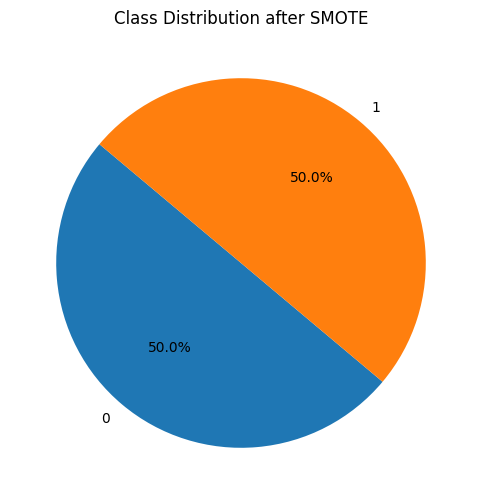

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(balance_smote, labels=balance_smote.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution after SMOTE')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,
                                                 random_state=42)
from sklearn.preprocessing import StandardScaler
import joblib
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
joblib.dump(scaler, '/content/drive/MyDrive/Fraud Detection/standard_scaler.joblib')

X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.50139148, -0.38398126,  2.05216905, ..., -0.40616356,
        -0.40653819, -0.41374088],
       [-0.28917157, -0.12024693,  1.0810614 , ..., -0.40616356,
        -0.40653819,  2.41697168],
       [ 0.34748814,  0.97278916, -0.89309823, ..., -0.40616356,
        -0.40653819, -0.41374088],
       ...,
       [ 0.77192795,  0.81243323,  4.66521528, ...,  2.46206231,
        -0.40653819, -0.41374088],
       [-0.50139148, -0.53501153,  1.06828367, ..., -0.40616356,
         2.45979351, -0.41374088],
       [-0.84094332, -0.65635889, -1.11670854, ..., -0.40616356,
         2.45979351, -0.41374088]])

In [ ]:
X_train.shape

(1208315, 53)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score,recall_score, precision_score
from sklearn.model_selection import cross_val_score
def metrics_score(model):
    pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, pred)
    recall = recall_score(y_train, pred)
    precision = precision_score(y_train, pred)
    cross_val = cross_val_score(model, X_train, y_train, cv=5, verbose=3)
    print(f"Accuracy: {accuracy}\nCross_Val_Score: {cross_val.mean()}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")

In [ ]:
metrics_score(model = model1)

[CV] END ................................ score: (test=0.986) total time=12.0min
[CV] END ................................ score: (test=0.986) total time=10.8min
[CV] END ................................ score: (test=0.986) total time=11.4min
[CV] END ................................ score: (test=0.986) total time=11.5min
[CV] END ................................ score: (test=0.986) total time=10.8min
Accuracy: 1.0
Cross_Val_Score: 0.9860897199819583
Recall: 1.0
Precision: 1.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
37760/37760 [==============================] - 84s 2ms/step - loss: 0.5147 - accuracy: 0.7444
Epoch 2/10
37760/37760 [==============================] - 83s 2ms/step - loss: 0.4438 - accuracy: 0.7924
Epoch 3/10
37760/37760 [==============================] - 82s 2ms/step - loss: 0.4122 - accuracy: 0.8122
Epoch 4/10
37760/37760 [==============================] - 82s 2ms/step - loss: 0.3934 - accuracy: 0.8243
Epoch 5/10
37760/37760 [==============================] - 82s 2ms/step - loss: 0.3808 - accuracy: 0.8314
Epoch 6/10
37760/37760 [==============================] - 85s 2ms/step - loss: 0.3712 - accuracy: 0.8379
Epoch 7/10
37760/37760 [==============================] - 85s 2ms/step - loss: 0.3636 - accuracy: 0.8421
Epoch 8/10
37760/37760 [==============================] - 87s 2ms/step - loss: 0.3576 - accuracy: 0.8456
Epoch 9/10
37760/37760 [==============================] - 86s 2ms/step - loss: 0.3524 - accuracy: 0.8488
Epoch 10/10
37760/37760 [==============================

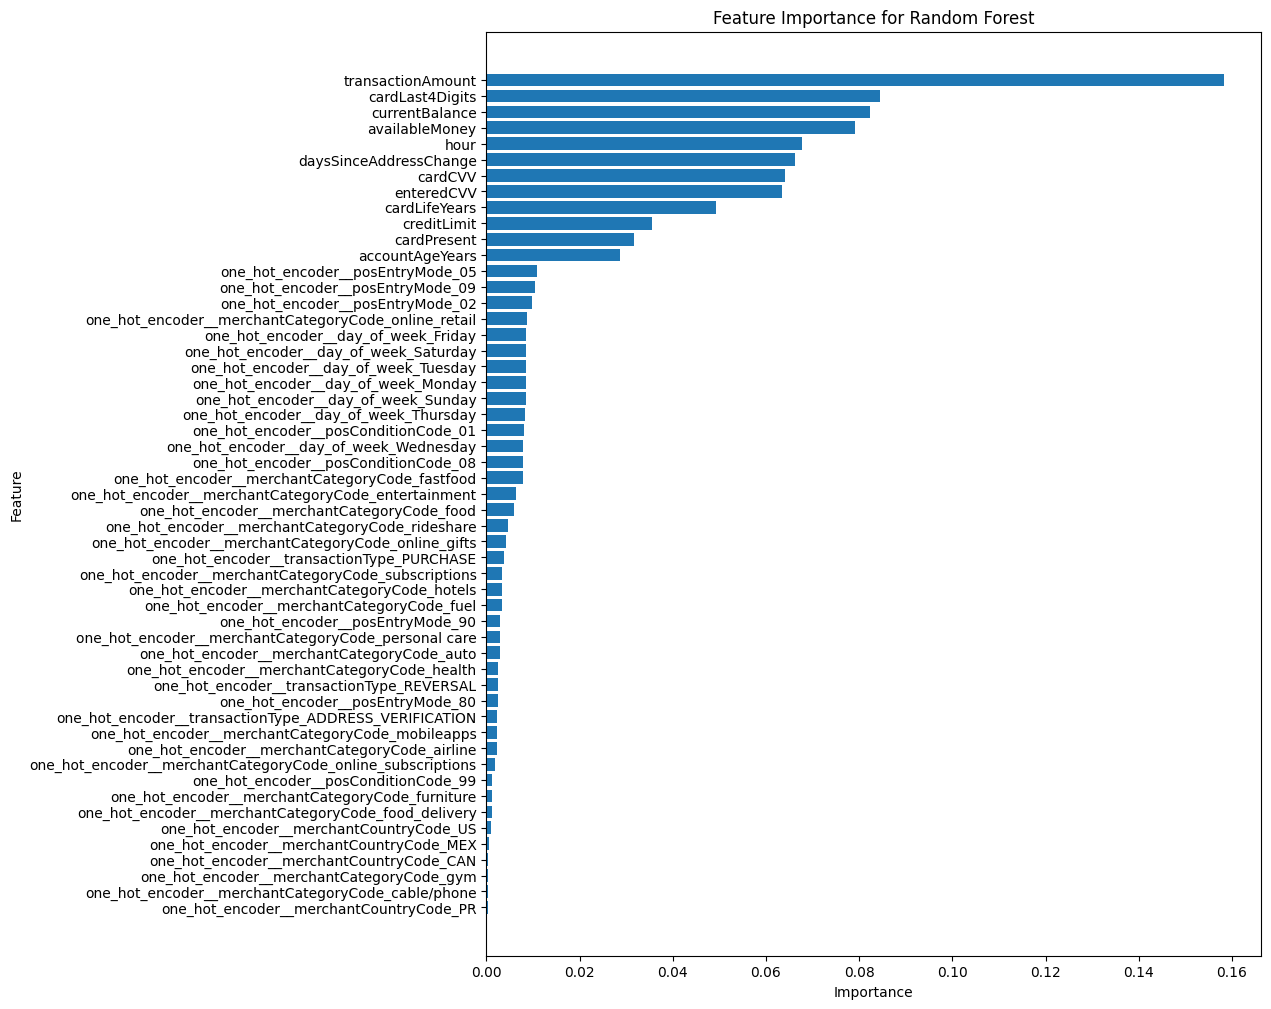

In [ ]:
importances = model1.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

In [ ]:
from sklearn.metrics import f1_score
def metrics_score_test(model, X, y, statement):
  print(statement)
  pred = model.predict(X)
  accuracy = accuracy_score(y, pred)
  recall = recall_score(y, pred)
  precision = precision_score(y, pred)
  f1_score_ =  f1_score(y, pred)
  print(f"Accuracy: {accuracy}")
  print(f"Recall: {recall}")
  print(f"Precision: {precision}")
  print(f"F1_Score: {f1_score_}")

In [ ]:
test_model1 = metrics_score_test(model1, X_test, y_test, "METRICS FOR RANDOM FOREST")
test_model1

METRICS FOR RANDOM FOREST
Accuracy: 0.9897808189248508
Recall: 0.99506761396651
Precision: 0.9847099796786482
F1_Score: 0.9898617027216089


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("METRICS FOR NEURAL NETWORK")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

9440/9440 [==============================] - 16s 2ms/step - loss: 0.3603 - accuracy: 0.8472
METRICS FOR NEURAL NETWORK
Loss: 0.3602837920188904
Accuracy: 0.8471890091896057


In [ ]:
from joblib import load, dump
model1_filename = '/content/drive/MyDrive/Fraud Detection/rf_model.joblib'
dump(model1, model1_filename)

['/content/drive/MyDrive/Fraud Detection/rf_model.joblib']

In [ ]:
model2_filename = '/content/drive/MyDrive/Fraud Detection/neural_model.joblib'
dump(model, model2_filename)

['/content/drive/MyDrive/Fraud Detection/neural_model.joblib']

In [ ]:
model1_filename = '/content/drive/MyDrive/Fraud Detection/rf_model.joblib'

In [ ]:
from joblib import load, dump
rf_model = load(model1_filename)

In [ ]:
new_test = X_test[15:25]
print('TESTING RANDOM FOREST')
rf_model.predict(new_test)

TESTING RANDOM FOREST


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
print('TESTING NN MODEL')
neural_model.predict(new_test)

TESTING NN MODEL
1/1 [==============================] - 0s 480ms/step


array([[0.6508991 ],
       [0.10931639],
       [0.84475076],
       [0.91988075],
       [0.85028803],
       [0.6679714 ],
       [0.9967759 ],
       [0.5499654 ],
       [0.70412064],
       [0.98692524]], dtype=float32)

In [ ]:
list(y_test[15:25])

[1, 0, 1, 1, 0, 1, 1, 1, 1, 1]

## **Testing the model by uploading transactions logs file**

In [13]:
import json
import pandas as pd
filename_ = "/content/drive/MyDrive/Fraud Detection/transaction_log.txt"
def prepare_data(file = filename_):
  data = []
  variables = []
  with open(file, 'r') as file:
      for line in file:
          line.strip()
          if line:
              data.append(json.loads(line))

  for key in data[0]:
    variables.append(key)
  df = pd.DataFrame(data)
  return df

In [14]:
the_data = prepare_data(filename_)
the_data.head()

,accountNumber,customerId,creditLimit,availableMoney,currentBalance,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,cardLast4Digits,transactionType,isFraud,echoBuffer,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,863358589,863358589,2500.0,1304.20,1195.80,2016-09-08T00:36:52,72.83,West End Beauty #178111,US,US,...,787,PURCHASE,True,,,,,,,False
1,863358589,863358589,2500.0,905.52,1594.48,2016-09-10T16:51:37,23.66,West End Beauty #195148,US,US,...,6614,PURCHASE,True,,,,,,,False
2,863358589,863358589,2500.0,1354.24,1145.76,2016-10-08T12:10:10,97.72,West End Beauty #442869,US,US,...,787,PURCHASE,True,,,,,,,False


In [15]:
the_data.shape

(3, 29)

In [17]:
import warnings
warnings.filterwarnings('ignore')
processed_data = processing_data(the_data)

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
def transforming_data(processed_dataframe):
  categorical_feature = ['merchantCountryCode','posEntryMode', 'posConditionCode',
                         'merchantCategoryCode','transactionType','day_of_week']

  encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
  ct = ColumnTransformer([('one_hot_encoder', encoder, categorical_feature)],
                         remainder='drop')
  data_encoded = ct.fit_transform(processed_dataframe)
  data_encoded = pd.DataFrame(data_encoded, columns= ct.get_feature_names_out())

  other_feature = ['creditLimit', 'availableMoney','transactionAmount', 'cardCVV',
                  'enteredCVV', 'cardLast4Digits', 'currentBalance',
                 'cardPresent', 'hour', 'accountAgeYears',
                 'cardLifeYears', 'daysSinceAddressChange']

  final_data = pd.concat([processed_dataframe[other_feature], data_encoded], axis=1)

  return final_data

In [19]:
transformed_data = transforming_data(processed_data)
transformed_data.shape

(3, 21)

In [20]:
reference_variable = ['creditLimit', 'availableMoney', 'transactionAmount', 'cardCVV',
                      'enteredCVV', 'cardLast4Digits', 'currentBalance', 'cardPresent',
                      'hour', 'accountAgeYears', 'cardLifeYears', 'daysSinceAddressChange',
                      'one_hot_encoder__merchantCountryCode_CAN',
                      'one_hot_encoder__merchantCountryCode_MEX','one_hot_encoder__merchantCountryCode_PR',
                      'one_hot_encoder__merchantCountryCode_US','one_hot_encoder__posEntryMode_02',
                      'one_hot_encoder__posEntryMode_05','one_hot_encoder__posEntryMode_09', 'one_hot_encoder__posEntryMode_80',
                      'one_hot_encoder__posEntryMode_90','one_hot_encoder__posConditionCode_01',
                      'one_hot_encoder__posConditionCode_08', 'one_hot_encoder__posConditionCode_99',
                      'one_hot_encoder__merchantCategoryCode_airline','one_hot_encoder__merchantCategoryCode_auto',
                      'one_hot_encoder__merchantCategoryCode_cable/phone',
                      'one_hot_encoder__merchantCategoryCode_entertainment',
                      'one_hot_encoder__merchantCategoryCode_fastfood',
                      'one_hot_encoder__merchantCategoryCode_food',
                      'one_hot_encoder__merchantCategoryCode_food_delivery',
                      'one_hot_encoder__merchantCategoryCode_fuel',
                      'one_hot_encoder__merchantCategoryCode_furniture',
                      'one_hot_encoder__merchantCategoryCode_gym',
                      'one_hot_encoder__merchantCategoryCode_health',
                      'one_hot_encoder__merchantCategoryCode_hotels',
                      'one_hot_encoder__merchantCategoryCode_mobileapps',
                      'one_hot_encoder__merchantCategoryCode_online_gifts',
                      'one_hot_encoder__merchantCategoryCode_online_retail',
                      'one_hot_encoder__merchantCategoryCode_online_subscriptions',
                      'one_hot_encoder__merchantCategoryCode_personal care',
                      'one_hot_encoder__merchantCategoryCode_rideshare',
                      'one_hot_encoder__merchantCategoryCode_subscriptions',
                      'one_hot_encoder__transactionType_ADDRESS_VERIFICATION',
                      'one_hot_encoder__transactionType_PURCHASE',
                      'one_hot_encoder__transactionType_REVERSAL',
                      'one_hot_encoder__day_of_week_Friday',
                      'one_hot_encoder__day_of_week_Monday',
                      'one_hot_encoder__day_of_week_Saturday',
                      'one_hot_encoder__day_of_week_Sunday',
                      'one_hot_encoder__day_of_week_Thursday',
                      'one_hot_encoder__day_of_week_Tuesday',
                      'one_hot_encoder__day_of_week_Wednesday']
reference_dataframe = pd.DataFrame({col: [0] * transforming_data(processed_data).shape[0]  for col in reference_variable})

In [7]:
reference_dataframe.head()

,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,hour,accountAgeYears,...,one_hot_encoder__transactionType_ADDRESS_VERIFICATION,one_hot_encoder__transactionType_PURCHASE,one_hot_encoder__transactionType_REVERSAL,one_hot_encoder__day_of_week_Friday,one_hot_encoder__day_of_week_Monday,one_hot_encoder__day_of_week_Saturday,one_hot_encoder__day_of_week_Sunday,one_hot_encoder__day_of_week_Thursday,one_hot_encoder__day_of_week_Tuesday,one_hot_encoder__day_of_week_Wednesday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
def processing_data(dataframe):
  needed_features = ['creditLimit', 'availableMoney', 'transactionDateTime',
                     'transactionAmount', 'merchantCountryCode', 'posEntryMode',
                     'posConditionCode','merchantCategoryCode', 'currentExpDate'
                     ,'accountOpenDate','dateOfLastAddressChange', 'cardCVV',
                     'enteredCVV', 'cardLast4Digits','transactionType',
                     'currentBalance', 'cardPresent']
  data = dataframe[needed_features]

  features_notobject = ["cardCVV", "enteredCVV", "cardLast4Digits"]
  for column in features_notobject:
    data[column] = pd.to_numeric(data[column], errors='coerce')

  features_date = ['transactionDateTime', 'currentExpDate', 'accountOpenDate',
                 'dateOfLastAddressChange']
  for column in features_date:
    data[column] = pd.to_datetime(data[column], errors='coerce')

  data['hour'] = data['transactionDateTime'].dt.hour
  data['day_of_week'] = data['transactionDateTime'].dt.day_name()

  data['accountAgeDays'] = (data['transactionDateTime'] - data['accountOpenDate']).dt.days
  data['accountAgeYears'] = data['accountAgeDays'] / 365.25

  data['cardLifeMonths'] = ((data['currentExpDate'].dt.year - data['accountOpenDate'].dt.year) * 12
                        + (data['currentExpDate'].dt.month - data['accountOpenDate'].dt.month))

  data['cardLifeYears'] = data['cardLifeMonths'] / 12
  data['daysSinceAddressChange'] = (data['transactionDateTime'] - data['dateOfLastAddressChange']).dt.days

  selected_columns = ['creditLimit', 'availableMoney','transactionAmount',
                    'merchantCountryCode','posEntryMode', 'posConditionCode',
                    'merchantCategoryCode', 'cardCVV', 'enteredCVV',
                    'cardLast4Digits', 'transactionType', 'currentBalance',
                    'cardPresent', 'hour','day_of_week', 'accountAgeYears',
                    'cardLifeYears', 'daysSinceAddressChange']
  return data[selected_columns]

In [21]:
for row in range(transformed_data.shape[0]):
  for feature in reference_variable:
    if feature in list(transformed_data.columns):
      reference_dataframe.loc[row, feature]= transformed_data.loc[row, feature]
    else:
      reference_dataframe.loc[row, feature] = 0

In [ ]:
reference_dataframe.head()

,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,hour,accountAgeYears,...,one_hot_encoder__transactionType_ADDRESS_VERIFICATION,one_hot_encoder__transactionType_PURCHASE,one_hot_encoder__transactionType_REVERSAL,one_hot_encoder__day_of_week_Friday,one_hot_encoder__day_of_week_Monday,one_hot_encoder__day_of_week_Saturday,one_hot_encoder__day_of_week_Sunday,one_hot_encoder__day_of_week_Thursday,one_hot_encoder__day_of_week_Tuesday,one_hot_encoder__day_of_week_Wednesday
0,10000,7692.99,39.97,418,418,6210,2307.01,False,6,1.119781,...,0,1,0,0,0,1,0,0,0,0
1,2500,472.36,218.08,310,310,3618,2027.64,True,8,0.544832,...,0,1,0,0,0,1,0,0,0,0
2,5000,3984.21,49.27,264,264,4947,1015.79,False,9,1.965777,...,0,1,0,0,0,0,0,0,1,0
3,250,60.16,223.51,570,570,8541,189.84,True,15,1.149897,...,0,1,0,1,0,0,0,0,0,0
4,2500,745.99,138.96,737,737,8292,1754.01,False,13,0.999316,...,0,1,0,0,0,0,0,0,1,0


In [23]:
reference_dataframe = reference_dataframe.astype(int)

In [24]:
from sklearn.preprocessing import StandardScaler
import joblib
scaler = joblib.load('/content/drive/MyDrive/Fraud Detection/standard_scaler.joblib')
input = scaler.transform(reference_dataframe)
input[0]

array([-0.71361138, -0.55718841, -0.65671018,  0.88529553,  0.88691921,
       -1.31990424, -0.51825244,  1.32433   , -1.78021593,  0.07588602,
       -0.29106793, -0.53402802, -0.05520302, -0.06341677, -0.04129496,
        0.09393206, -0.57630067,  1.21427057, -0.65832381, -0.13693401,
       -0.16271396,  0.49553724, -0.48164313, -0.09448197, -0.13729424,
       -0.16763412, -0.03897811, -0.336118  , -0.43231636, -0.31728777,
       -0.08834657, -0.17813479, -0.09313524, -0.05186804, -0.14884562,
       -0.20238769, -0.13697477, -0.3162043 , -0.5802022 , -0.11628834,
        5.97281404, -0.25121166, -0.17666811, -0.16336126,  0.23352002,
       -0.16247264, -0.41350764, -0.40482418, -0.41115567, -0.40174093,
        2.46206231, -0.40653819, -0.41374088])

In [27]:
rf_model = joblib.load("/content/drive/MyDrive/Fraud Detection/rf_model_new.joblib")
account_numbers = the_data['accountNumber'].tolist()
predictions = rf_model.predict(input)
prediction_df = pd.DataFrame({'Account Number': account_numbers,'Prediction':
                                          ['Fraudulent' if pred == 1 else 'Not Fraudulent'
                                           for pred in predictions]})

In [28]:
prediction_df

,Account Number,Prediction
0,863358589,Fraudulent
1,863358589,Not Fraudulent
2,863358589,Fraudulent


In [32]:
fraud_status = ['Fraudulent' if x == 1 else 'Not Fraudulent' for x in the_data.isFraud.astype(int)]
print('Actual classes')
fraud_status

Actual classes


['Fraudulent', 'Fraudulent', 'Fraudulent']